<a href="https://colab.research.google.com/github/isaacropero/03MIAR_ALGORITMOS_DE_OPTIMIZACION/blob/main/Algoritmos_isaac_ropero_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # AG2 - Actividad Guiada 2
  ## Isaac Ropero Mendez
  ### https://github.com/isaacropero/03MIAR_ALGORITMOS_DE_OPTIMIZACION/


He añadido algunas cosas ya que me resultó interesante el algoritmo. Pero sigue manteniendo la esencia de lo que se hizo en clase.

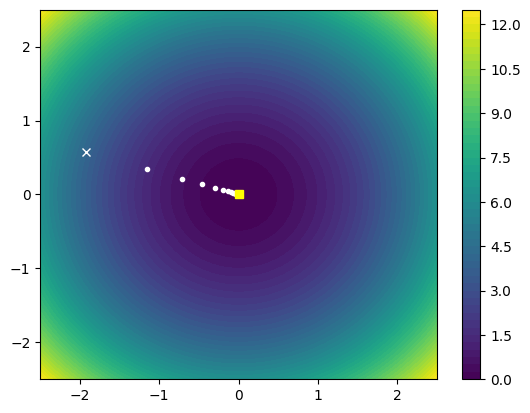

Solucion: P=(-0.00039590930347199006, 0.0001180606658201034); f(p)=1.7068249738956247e-07;iteraciones=53;TA=0.013888568037446715


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
#import sympy as sp

# Funcion paraboloide
f = lambda x: x[0]**2 + x[1]**2
# Derivada parcial
df = lambda x: [2*x[0], 2*x[1]]


x_range = 2.5
y_range = 2.5
num = 50

X = np.linspace(-x_range, x_range, num)
Y = np.linspace(-y_range, y_range, num)
Z = np.zeros((num,num))

for i,x in enumerate(X):
  for j,y in enumerate(Y):
    Z[i,j] = f([x,y])


plt.contourf(X,Y,Z,num)
plt.colorbar()

p_inicial = [random.uniform(-x_range, x_range), random.uniform(-y_range,y_range)]

plt.plot(p_inicial[0], p_inicial[1], "x", c="white")

p = p_inicial

# px = px - TA * ∇(px)
# py = py - TA * ∇(py)

TA = 0.2
decay_rate = 0.95

# Definir un umbral para decidir cuando detener el algoritmo
umbral = 1e-8
counter = 0
f_aux = f(p)

for _ in range(1000):
  counter += 1

  grad = df(p)
  p = p[0] - TA * grad[0], p[1] - TA * grad[1]
  plt.plot(p[0], p[1], ".", c="white")

  # Si la mejora entre la funcion objetivo y la anterior es menor que el umbral definido se detiene la ejecucion.
  if abs(f(p) - f_aux) < umbral:
    break

  TA = TA * decay_rate
  f_aux = f(p)

  if TA < 1e-10:
    break


plt.plot(p[0], p[1], "s", c="yellow")
plt.show()
print(f'Solucion: P={p}; f(p)={f(p)};iteraciones={counter};TA={TA}')




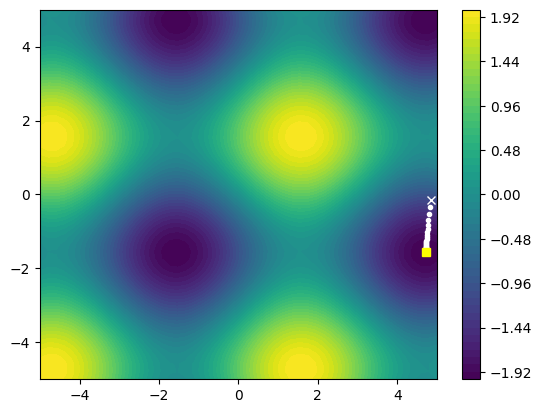

Solucion: P=(4.714472310558689, -1.5440435019855678); f(p)=-1.9996399943939132;iteraciones=188;TA=1.3656650171711399e-05


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
#import sympy as sp

# Funciones sinusoidales
f = lambda x: np.sin(x[0]) + np.sin(x[1])
# Derivada parcial
df = lambda x: [np.cos(x[0]), np.cos(x[1])]

x_range = 5
y_range = 5
num = 50

X = np.linspace(-x_range, x_range, num)
Y = np.linspace(-y_range, y_range, num)
Z = np.zeros((num,num))

for i,x in enumerate(X):
  for j,y in enumerate(Y):
    Z[i,j] = f([x,y])


plt.contourf(X,Y,Z,num)
plt.colorbar()

p_inicial = [random.uniform(-x_range, x_range), random.uniform(-y_range,y_range)]

plt.plot(p_inicial[0], p_inicial[1], "x", c="white")

p = p_inicial

# px = px - TA * ∇(px)
# py = py - TA * ∇(py)

TA = 0.2
decay_rate = 0.95

# Definir un umbral para decidir cuando detener el algoritmo
umbral = 1e-8
counter = 0
f_aux = f(p)

for _ in range(1000):
  counter += 1

  grad = df(p)
  p = p[0] - TA * grad[0], p[1] - TA * grad[1]
  plt.plot(p[0], p[1], ".", c="white")

  # Si la mejora entre la funcion objetivo y la anterior es menor que el umbral definido se detiene la ejecucion.
  if abs(f(p) - f_aux) < umbral:
    break

  TA = TA * decay_rate
  f_aux = f(p)

  if TA < 1e-10:
    break


plt.plot(p[0], p[1], "s", c="yellow")
plt.show()
print(f'Solucion: P={p}; f(p)={f(p)};iteraciones={counter};TA={TA}')




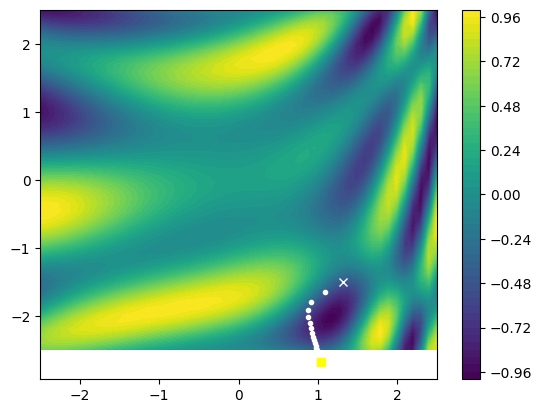

Solucion: P=(1.0338527396866126, -2.674429312577341); f(x,y)=-0.9746147875771795;iteraciones=92;TA=1.3711922648255989e-05


In [32]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
#import sympy as sp

# Funcion
f = lambda x: np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3) * np.cos(2*x[0] + 1 - np.e**x[1])

# Funcion
f2 = lambda x, y: np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2*x + 1 - np.e**y)

# Derivada aproximada
def df(p):
  h = 0.01
  # (f(x + h) - f(x)) / h

  grad = np.zeros(2)
  for i, x in enumerate(p):
    T = np.copy(p)
    T[i] = T[i]+h
    grad[i] = (f(T) - f(p)) / h
  #grad[0] = (f([T[0]+h, T[1]]) - f(p)) / h
  #grad[1] = (f([T[0], T[1]+h]) - f(p)) / h
  return grad

def df2(x, y):
  h = 0.01
  # (f(x + h) - f(x)) / h
  df_x = (f2(x+h, y) - f2(x,y)) / h
  df_y = (f2(x, y+h) - f2(x,y)) / h
  return [df_x,df_y]

x_range = 2.5
y_range = 2.5
num = 50

X = np.linspace(-x_range, x_range, num)
Y = np.linspace(-y_range, y_range, num)
Z = np.zeros((num,num))

for i,x in enumerate(X):
  for j,y in enumerate(Y):
    Z[i,j] = f([x,y])


plt.contourf(X,Y,Z,num)
plt.colorbar()

p_inicial = [random.uniform(-x_range, x_range), random.uniform(-y_range,y_range)]

plt.plot(p_inicial[0], p_inicial[1], "x", c="white")

p = p_inicial

# px = px - TA * ∇(px)
# py = py - TA * ∇(py)

TA = 0.2
decay_rate = 0.9

# Definir un umbral para decidir cuando detener el algoritmo
umbral = 1e-6
counter = 0
f_aux = f(p)

for _ in range(2000):
  counter += 1

  grad = df(p)
  #print(f'df: {grad}\ndf2: {df2(p[0],p[1])}')

  p = p[0] - TA * grad[0], p[1] - TA * grad[1]
  plt.plot(p[0], p[1], ".", c="white")

  # Si la mejora entre la funcion objetivo y la anterior es menor que el umbral definido se detiene la ejecucion.
  if abs(f(p) - f_aux) < umbral:
    break

  TA = TA * decay_rate
  f_aux = f(p)

  if TA < 1e-10:
    break

plt.plot(p[0], p[1], "s", c="yellow")
plt.show()
print(f'Solucion: P={p}; f(x,y)={f(p)};iteraciones={counter};TA={TA}')

